 
The data that will be worked on is from the players.csv and contains the following 7 variables with 196 players recorded: 

- experience levels( from Pro to Beginner recorded as characters) 

- if they are a subscriber (true or false recorded as logical) 

- their email, amount of played hours on the game (recorded as double) 

- their name (recorded as characters) 

- gender (Female, Male, Non-binary, and more, all recorded as characters) 

- age (in years recorded as double). 

 
Potential issues/questions: 

- a big range of experience levels for the number of observations
- how the experience level of a player is classified is unclear. Is there is a big range from one level to another?
- Is the time a player has spent playing from when they first joined the game? 
- from the age variables, many players seem to be in their teens to early twenties. It can be an issue if the sample ages are not fully representative of the all the players' ages in real life  

 

The broad question to be addressed from this dataset is Question 2. The specific question is: From the number of played hours and age of a player, can you determine if they have subscribed? 


The players.csv data will provide the predictor variables gender and age. The variable being predicted will be subscribe. Since each cell already has one value, each row one observation and each column one variable, I believe the minimum necessary wrangling to turn the data into a tidy format has already been completed.  

In [1]:
library(tidyverse)

players_data<- read_csv("https://raw.githubusercontent.com/lchi24/player_data/refs/heads/main/players.csv")

players_data

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


The code to find the average of the variables is here: 
average_of_variables<- summarize(players_data, mean_played_hours=mean(played_hours), mean_age=mean(Age, na.rm=TRUE))

The summary of the only two quantitative variables in the data set:

| Played Hours  |    Age    |
| ------------- | --------- |
| 5.845918 | 20.52062 |

Since I am interested in exploring information from the vairables experience, played_hours, and Age, I will try and create visualization of these variables so I can understand any potential relationships with color coded scatterplot with the code shown below. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


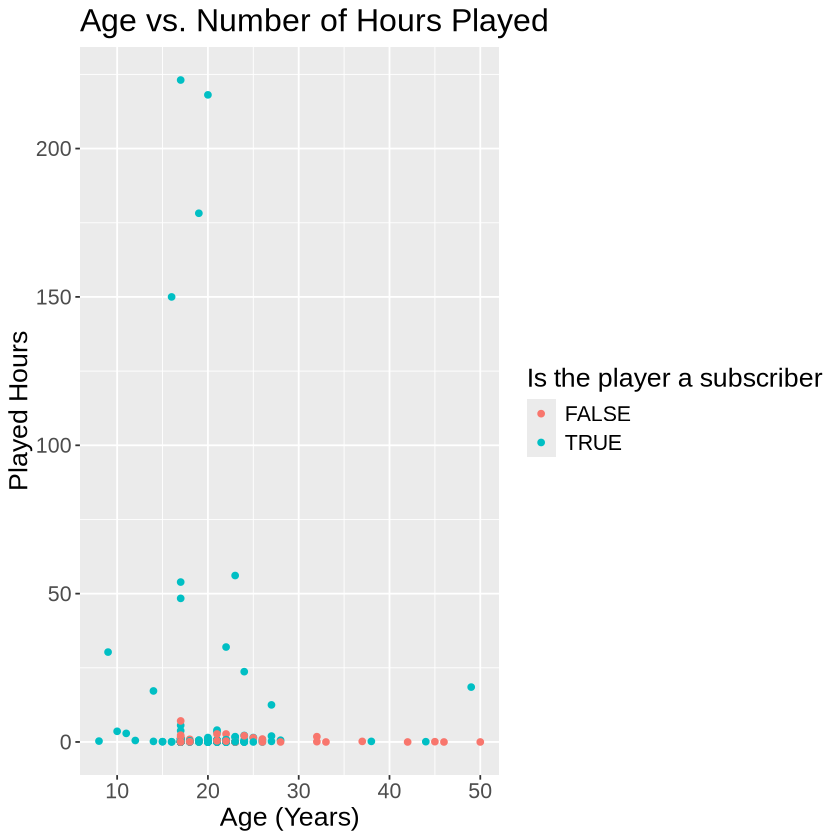

In [2]:
variable_visualization <- ggplot(players_data, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point() +
  labs(title = "Age vs. Number of Hours Played",
       x = "Age (Years)", y = "Played Hours", color = "Is the player a subscriber") +
    theme(text=element_text(size=16))

variable_visualization

From scatterplot: 

- clustering at the bottom of the age axis. Therefore, the majority of the players played within 50 hours. If there is a further exploration of the data, changes might have to be made (like change in axes size).  

- there exist more players that play for less than 50 hours (may question if the data set is a good representation of general players) 

- more points seem to be True than False  

 
A method to answer the specific question is knn-classification. We are trying to determine if they are a subscriber or not (a categorical value), and the relationship between the variables may not be linear. With a new observation, its nearest neighbors can help classify it. Afterwards, its accuracy can be calculated and depending on its score, you can predict if it is yes or no.  

Points to consider with this method: The result may be limited by the data provided. For example, if subscribers are rarer than non-subscribers, k-NN might bias toward the majority class. 

  
Plans regarding model choice: 

- compare k-NN classification with different values of k by checking for accuracy, precision, and recall

- determine the best value of k by 5-fold cross-validation. This ensures that the model will generalizes well  

- select the best k using cross-validation on the training set but before training, normalize the Age and played_hours variables to ensure that one feature does not dominate distance calculations 

- removing rows with missing data 

- split the data to training set (70%) and testing set (30%) to enable avaluating the model's final performance at the end.  
